In [17]:
import geopandas as gpd
import fiona

In [18]:
gdf = gpd.read_file('gadm41_EGY_2.shp')

In [19]:
gdf

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,EGY.1.1_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Aja,Aga,NA,Markaz,Subdivision,NA,EG.DQ.AG,"POLYGON ((31.30377 30.99935, 31.31002 30.99356..."
1,EGY.1.2_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Jamaliyah,NA,NA,Kism,Subdivision,NA,EG.QH.GA,"POLYGON ((31.99799 31.22747, 31.98231 31.22915..."
2,EGY.1.3_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Mansurah,NA,NA,Markaz,Subdivision,NA,EG.DQ.MA,"POLYGON ((31.39126 30.93035, 31.38016 30.96288..."
3,EGY.1.4_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Mansurah 1,NA,NA,Kism,Subdivision,NA,EG.DQ.MF,"POLYGON ((31.39234 31.01250, 31.37525 31.00095..."
4,EGY.1.5_1,EGY,Egypt,EGY.1_1,Ad Daqahliyah,الدقهلية,Al-Mansurah 2,NA,NA,Markaz,Subdivision,NA,EG.DQ.MK,"POLYGON ((31.39234 31.01250, 31.38253 31.03385..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,EGY.27.14_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Sawhaj 2,NA,NA,Kism,Subdivision,NA,EG.SJ.SS,"POLYGON ((31.70411 26.56144, 31.70938 26.54274..."
339,EGY.27.15_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Tahta,NA,NA,Markaz,Subdivision,NA,EG.SJ.TM,"POLYGON ((31.50795 26.85638, 31.51352 26.84279..."
340,EGY.27.16_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Tahta City,NA,NA,Kism,Subdivision,NA,EG.SJ.TK,"POLYGON ((31.49783 26.74574, 31.48510 26.74924..."
341,EGY.27.17_1,EGY,Egypt,EGY.27_1,Suhaj,NA,Tima,NA,NA,Markaz,Subdivision,NA,EG.SJ.TA,"POLYGON ((31.44358 26.94474, 31.48056 26.91307..."


<Axes: >

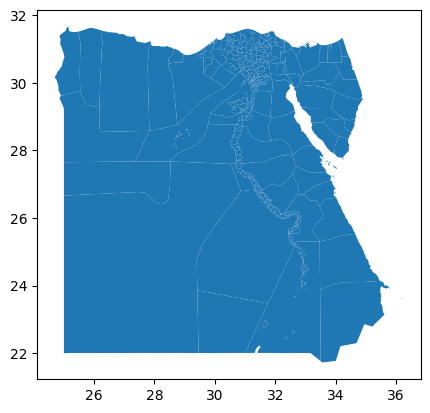

In [20]:
gdf.plot()

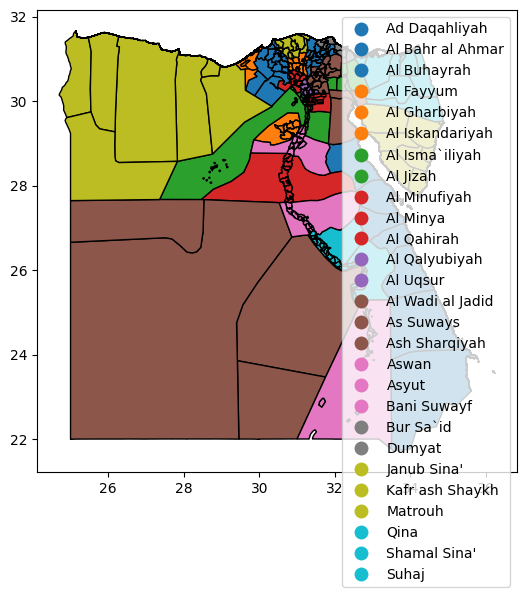

In [21]:
ax= gdf.plot(column='NAME_1', figsize=(10,6), edgecolor='black', legend=True)

<Axes: >

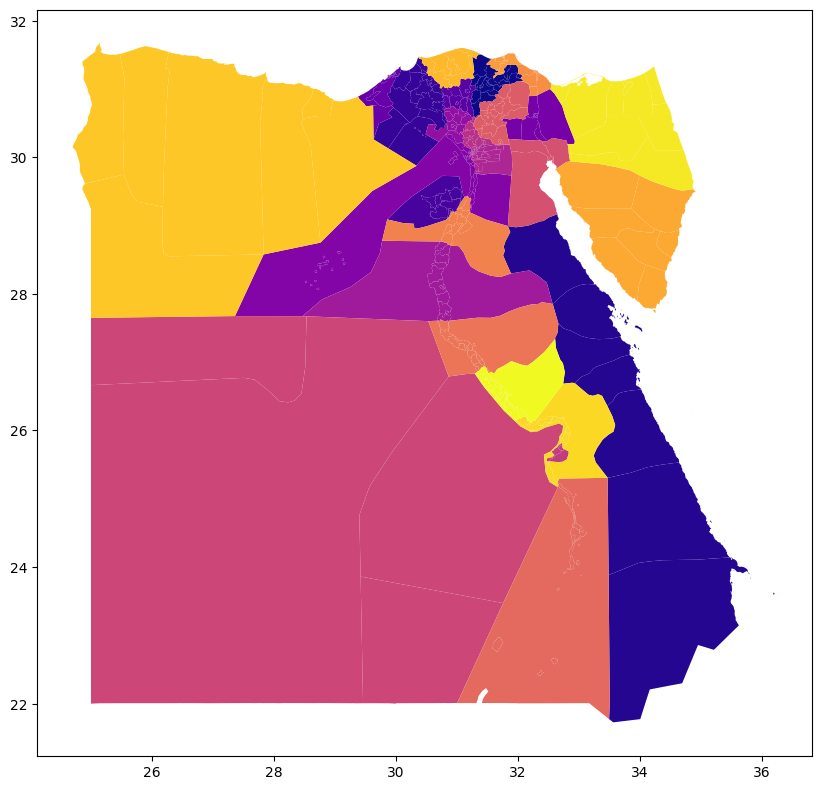

In [22]:
gdf.plot(column = 'NAME_1', cmap = 'plasma', figsize = (10,10))

# **Data Cleaning**

---



In [36]:
null_values = gdf.isnull().sum()
print(null_values)

GID_2                     0
GID_0                     0
COUNTRY                   0
GID_1                     0
NAME_1                    0
NL_NAME_1                 0
NAME_2                    0
VARNAME_2                 0
NL_NAME_2                 0
TYPE_2                    0
ENGTYPE_2                 0
CC_2                      0
HASC_2                    0
geometry                  0
distance_from_centroid    0
dtype: int64


In [37]:
duplicates = gdf.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [38]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   GID_2                   343 non-null    object  
 1   GID_0                   343 non-null    object  
 2   COUNTRY                 343 non-null    object  
 3   GID_1                   343 non-null    object  
 4   NAME_1                  343 non-null    object  
 5   NL_NAME_1               343 non-null    object  
 6   NAME_2                  343 non-null    object  
 7   VARNAME_2               343 non-null    object  
 8   NL_NAME_2               343 non-null    object  
 9   TYPE_2                  343 non-null    object  
 10  ENGTYPE_2               343 non-null    object  
 11  CC_2                    343 non-null    object  
 12  HASC_2                  343 non-null    object  
 13  geometry                343 non-null    geometry
 14  distance_from_cent

<ipython-input-39-76c75b29368d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.unary_union.centroid


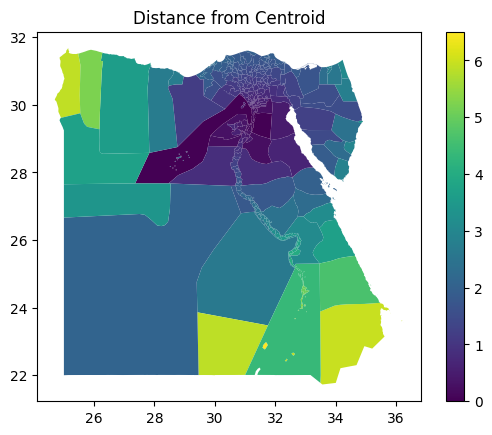

Spatial outliers identified:
           GID_2 GID_0 COUNTRY     GID_1            NAME_1  \
23    EGY.2.4_1   EGY   Egypt   EGY.2_1  Al Bahr al Ahmar   
24    EGY.2.5_1   EGY   Egypt   EGY.2_1  Al Bahr al Ahmar   
192  EGY.14.2_1   EGY   Egypt  EGY.14_1  Al Wadi al Jadid   
222  EGY.17.1_1   EGY   Egypt  EGY.17_1             Aswan   
223  EGY.17.2_1   EGY   Egypt  EGY.17_1             Aswan   
224  EGY.17.3_1   EGY   Egypt  EGY.17_1             Aswan   
225  EGY.17.4_1   EGY   Egypt  EGY.17_1             Aswan   
227  EGY.17.6_1   EGY   Egypt  EGY.17_1             Aswan   
228  EGY.17.7_1   EGY   Egypt  EGY.17_1             Aswan   
229  EGY.17.8_1   EGY   Egypt  EGY.17_1             Aswan   
296  EGY.24.3_1   EGY   Egypt  EGY.24_1           Matrouh   
299  EGY.24.6_1   EGY   Egypt  EGY.24_1           Matrouh   

                 NL_NAME_1           NAME_2 VARNAME_2 NL_NAME_2  TYPE_2  \
23     محافظة البحر الأحمر     Ash-Shalatin        NA        NA    Kism   
24     محافظة البحر الأحمر

In [39]:
centroid = gdf.geometry.centroid.unary_union.centroid

gdf['distance_from_centroid'] = gdf.geometry.apply(lambda x: x.distance(centroid))


gdf.plot(column='distance_from_centroid', legend=True)
plt.title('Distance from Centroid')
plt.show()

Q1 = gdf['distance_from_centroid'].quantile(0.25)
Q3 = gdf['distance_from_centroid'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

spatial_outliers = gdf[gdf['distance_from_centroid'] > threshold]
print("Spatial outliers identified:\n", spatial_outliers)

**Clustring**

---



In [41]:
gdf['centroid'] = gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
centroids_gdf = gpd.GeoDataFrame(gdf[['centroid']], geometry='centroid')
print(centroids_gdf.head())

                    centroid
0  POINT (31.30851 30.89424)
1  POINT (31.90862 31.26762)
2  POINT (31.46652 31.03365)
3  POINT (31.37960 31.03338)
4  POINT (31.41273 31.04715)


<ipython-input-41-ca17fbeb7828>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


In [44]:
from sklearn.cluster import DBSCAN
import numpy as np

# Extract the coordinates of the centroids
coords = np.array(list(centroids_gdf.geometry.apply(lambda x: (x.x, x.y))))

# Apply DBSCAN clustering
db = DBSCAN(eps=0.1, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

# Add the cluster labels to the GeoDataFrame
centroids_gdf['cluster'] = db.labels_

print(centroids_gdf)

                      centroid  cluster
0    POINT (31.30851 30.89424)        0
1    POINT (31.90862 31.26762)        0
2    POINT (31.46652 31.03365)        0
3    POINT (31.37960 31.03338)        0
4    POINT (31.41273 31.04715)        0
..                         ...      ...
338  POINT (31.70607 26.54233)        0
339  POINT (31.46357 26.78530)        0
340  POINT (31.49020 26.76587)        0
341  POINT (31.42511 26.86811)        0
342  POINT (32.20849 26.69773)        0

[343 rows x 2 columns]


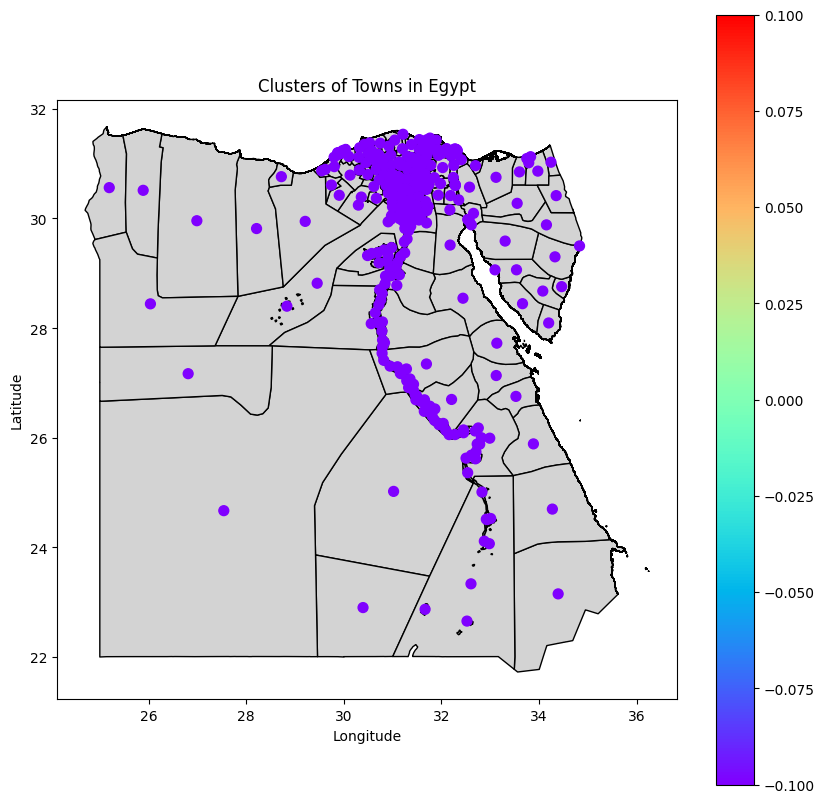

In [43]:
import matplotlib.pyplot as plt

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
centroids_gdf.plot(ax=ax, column='cluster', cmap='rainbow', legend=True, markersize=50)
plt.title('Clusters of Towns in Egypt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()